# TP arbre de décision, random forest, bagging et boosting

Mise en oeuvre de ces méthodes en langage python à l'aide du module sk-learn. Pour rappel, le bagging et le boosting sont mis en oeuvre sur les arbres de décision, mais ces fonctions sont utilisables sur d'autres modèles. 

## Importation des données

Nous allons travailler sur les données spam7. Et prédire si oui ou non les individus sont des spams.

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [10]:
data = pd.read_csv("spam7.csv",sep=";")
data.head(10)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
5,54,0.000,0.000,0.00,0.00,0.00,y
6,112,0.054,0.164,0.00,0.00,0.00,y
7,49,0.000,0.000,0.00,0.00,0.00,y
8,1257,0.203,0.181,0.15,0.00,0.15,y
9,749,0.081,0.244,0.00,0.19,0.06,y


In [7]:
#Xbis = pd.read_csv("breast_cancer.csv").iloc[:,1:32]
#Ybis = np.array(Xbis.iloc[:,0])
#Xbis = Xbis.iloc[:,1:]
#Xbis.head()

In [8]:
data.shape

(4601, 7)

In [11]:
Y = data[['yesno']]
X = data.drop('yesno', 1)

/tmp/ipykernel_5046/1247371808.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('yesno', 1)


In [10]:
datareduce=data.iloc[1:200,]
Y = data[['yesno']]
X = data.drop('yesno', 1)

Séparation des données en échantillon d'apprentissage 80% et un échantillon test 20%.

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

## Arbre de décision

Voici les pages sklearn avec le détail des fonctions et leurs différents paramètres :

Classification :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Régression : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

On s'intéressera notamment à deux paramètres : le paramètre max_depth est un seuil sur la profondeur maximale de l’arbre. Le paramètre min_samples_leaf donne le nombre minimal d’individus dans un nœud feuille.  Il y a bien entendu d'autres paramètres que l'on peut contrôler et optimiser.

### Construction du modèle

In [5]:
clf = DecisionTreeClassifier() #avec les paramètres par défaut
# Les paramètres par défaut sont l'impureté de Gini, un choix de division optimisé (et non random), la profondeur de l'arbre non limitée, le nb minimal d'individus par noeud égal à 2.
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

### Prédiction

In [18]:
pred = clf.predict(Xtest)
pred[0:10] #résultat sur les premièrs individus test

array(['n', 'n', 'n', 'y', 'n', 'n', 'y', 'y', 'n', 'n'], dtype=object)

### Probabilité d'appartenir à chaque classe

In [19]:
proba = clf.predict_proba(Xtest)
proba[0:20]

array([[1.        , 0.        ],
       [0.97560976, 0.02439024],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.93333333, 0.06666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

### Erreurs d'apprentissage et de test

In [6]:
print("Les résultats avec les paramètres par défaut")
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(clf.score(Xtrain, Ytrain)))
print('En test, le taux de prédiction est de : {:.2f}'
     .format(clf.score(Xtest, Ytest)))

Les résultats avec les paramètres par défaut
En entrainement, le taux de prédiction est de : 0.97 
En test, le taux de prédiction est de : 0.85


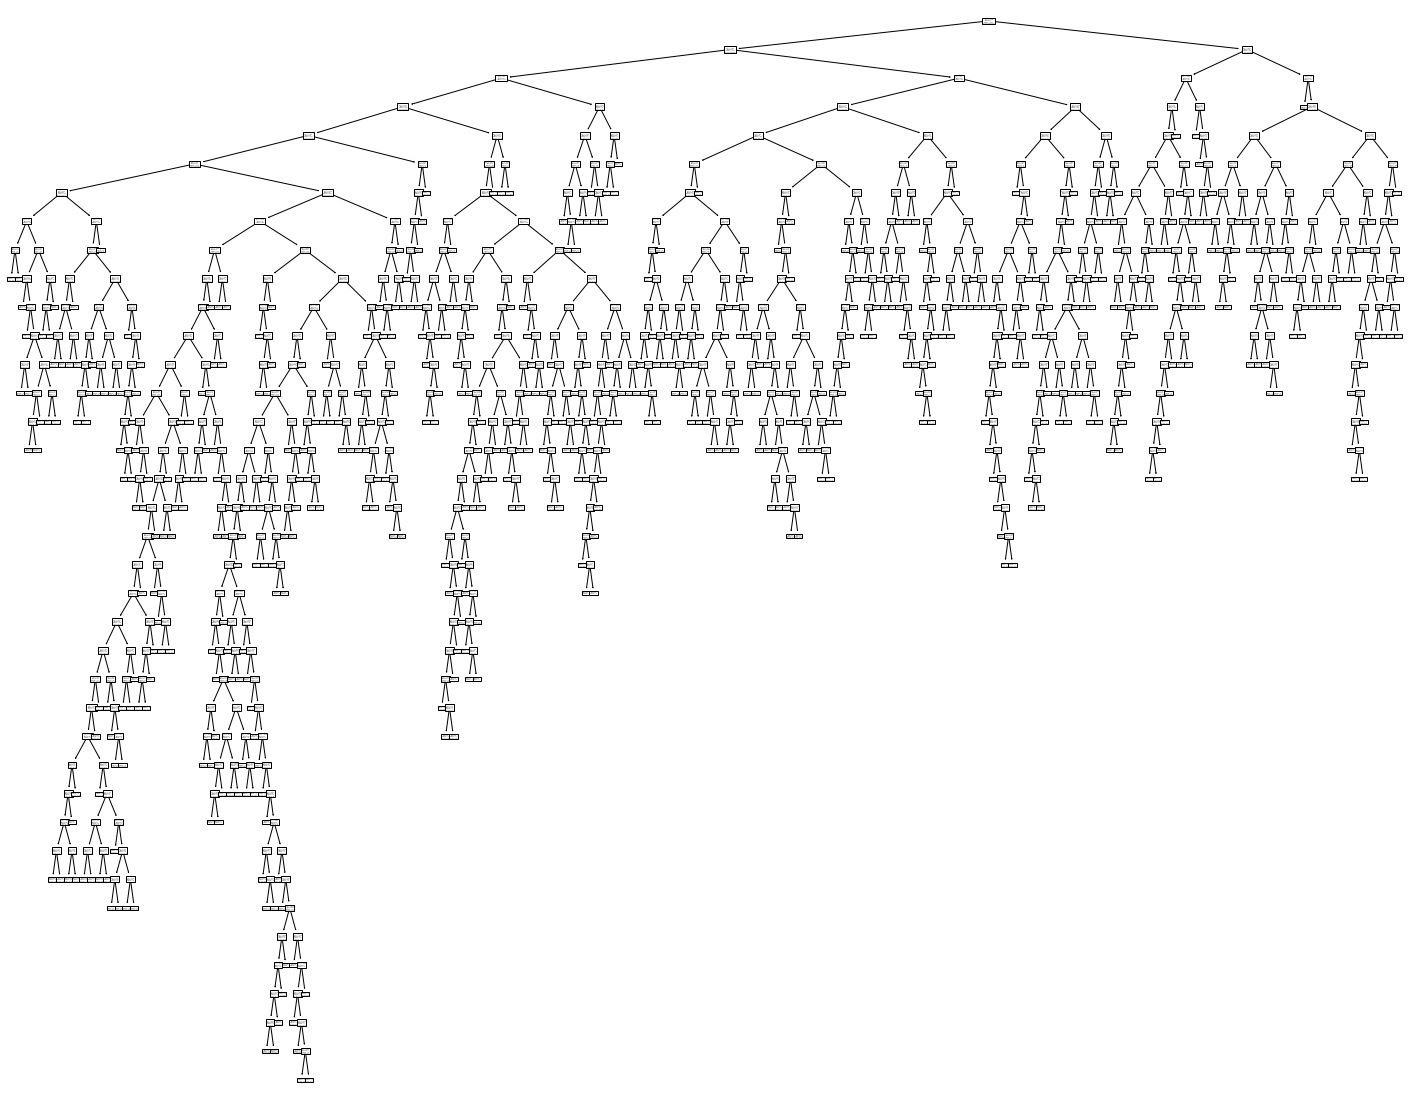

In [96]:
## Attention, long à afficher.

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf)


### Optimisation des paramètres

On peut changer les paramètres par défaut de la fonction soit en mettant les valeurs directement dans la fonction (exemple : clf = DecisionTreeClassifier(max_depth = 5)) soit en créant une grille de recherche des meilleurs paramètres. Nous allons utiliser la seconde technique qui effectue de la cross validation pour chaque combinaison de paramètre afin de trouver les meilleurs dans la plage donnée.

In [13]:
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [3, 5,7,10],
      "min_samples_split": [2, 3, 5, 10],
        "criterion": ["gini","entropy"],
         "ccp_alpha": [0,0.1,0.3]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(Xtrain,Ytrain)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(grid_search.best_estimator_.score(Xtrain, Ytrain)))
print('En test, le taux de prédiction est de : {:.2f}'
     .format(grid_search.best_estimator_.score(Xtest, Ytest)))

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_split=5)
{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
En entrainement, le taux de prédiction est de : 0.88 
En test, le taux de prédiction est de : 0.85


In [14]:
clfopt = grid_search.best_estimator_ #avec les paramètres par défaut
clfopt.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_split=5)

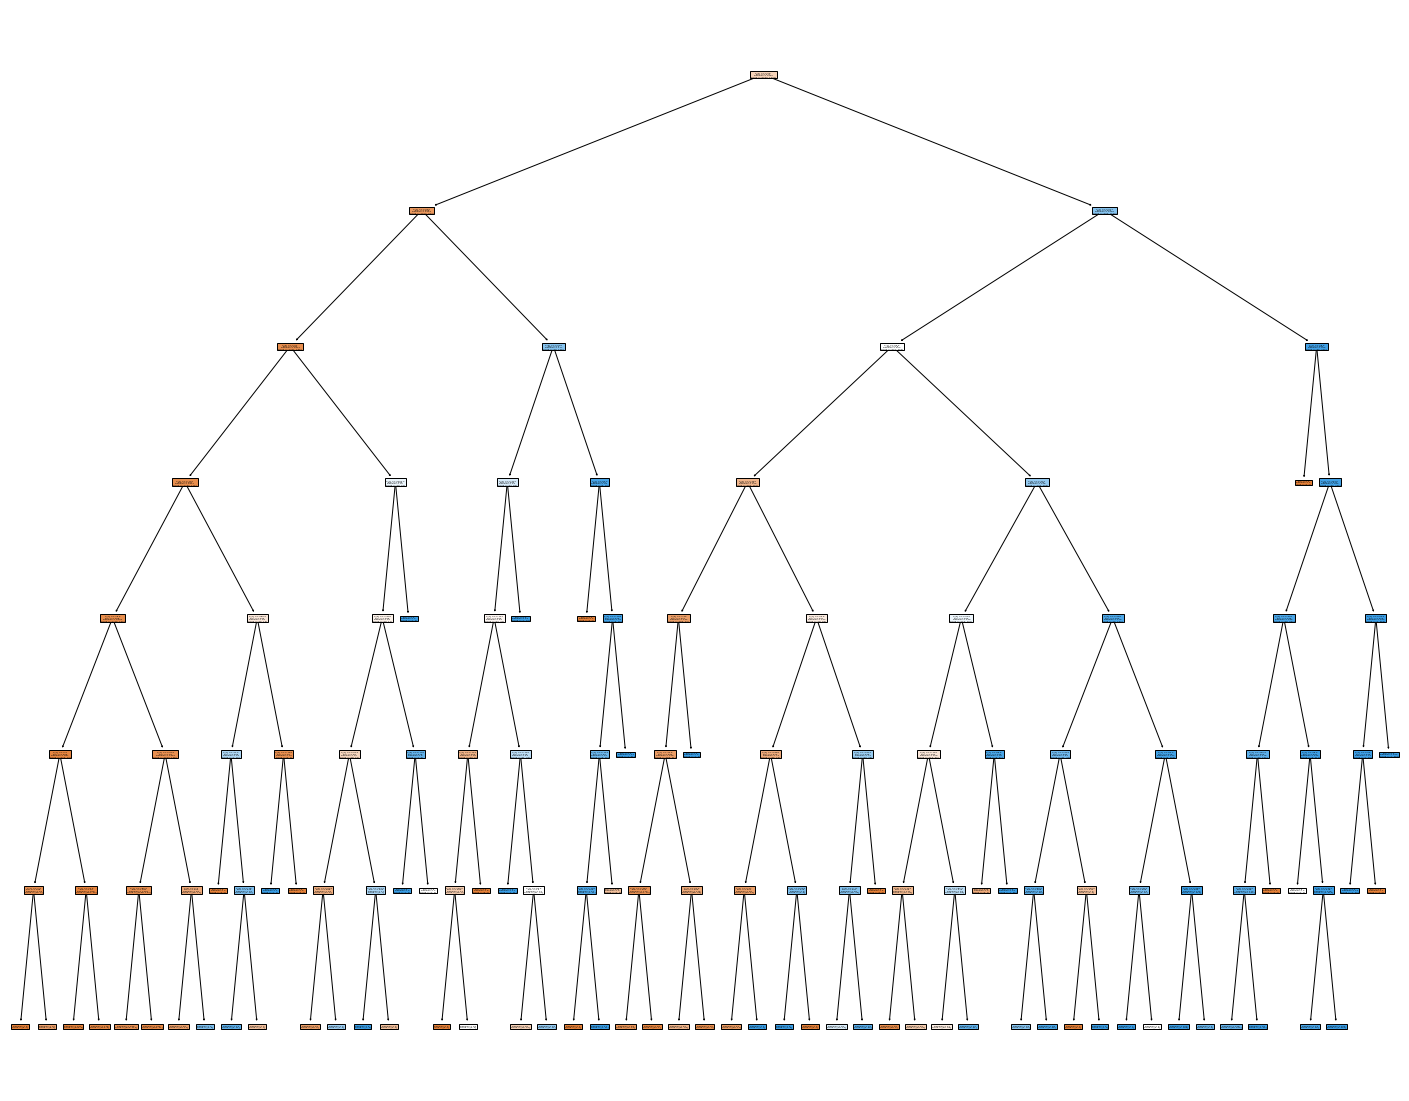

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clfopt,filled=True)

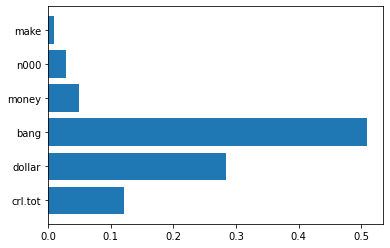

In [11]:
## Importance des variables
imp1=clfopt.feature_importances_
feat = list(Xtrain.columns)
p = plt.barh(feat,imp1)


## Bagging

In [116]:
from sklearn.ensemble import BaggingClassifier

Dans Scikit-learn, les méthodes de bagging sont implémentées via la classe BaggingClassifier et BaggingRegressor dont voici la documentation :

Classification :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=baggingclassifier#sklearn.ensemble.BaggingClassifier

Régression : 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html?highlight=baggingreg#sklearn.ensemble.BaggingRegressor

Les constructeurs prennent en paramètres (entre autres) :
- n_estimators : le nombre d'estimateurs bootstrap utilisé
- max_samples : la taille de chaque échantillon bootstrap (par défaut, taille de l'échantillon).
- max_features : le nombre de variables utilisées dans chaque arbre (on s'approche de RF).
- bootstrap : boolean, optionnel (default=True). Tirage des points avec remise ou non.
- bootstrap_features : boolean, optionnel (default=False). Tirage des attributs avec remise ou non.
- oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag).

On va faire varier les paramètres : n_estimators et max_samples.

In [121]:
clf = BaggingClassifier()

clf.fit(Xtrain, Ytrain.values.ravel()) #.values.ravel() sert à transformer Ytrain en un vecteur
print("Les résultats avec les paramètres par défauts")
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(clf.score(Xtrain, Ytrain)))
print('En test, le taux de prédiction est de : {:.2f}'
     .format(clf.score(Xtest, Ytest)))
#print('En test, le taux de prédiction est de : {:.2f}'
 #    .format(clf.oob_score)

Les résultats avec les paramètres par défauts
En entrainement, le taux de prédiction est de : 0.96 
En test, le taux de prédiction est de : 0.85


In [122]:
## Pour le score Out Of Bag, ajouter "oob_score=True" dans les arguments.

De la même manière que pour un arbre, on peut faire une grille de recherche pour trouver les meilleurs paramètres.

In [126]:
from sklearn.model_selection import GridSearchCV
pgrid = {"n_estimators": [50, 100, 200],
      "max_samples": [0.4,0.6,0.8], "max_features":[0.8,1]
        }
grid_search = GridSearchCV(BaggingClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(Xtrain,Ytrain.values.ravel())
print(grid_search.best_estimator_)
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(grid_search.best_estimator_.score(Xtrain, Ytrain)))
print(f'En test, le taux de prédiction est de {grid_search.best_estimator_.score(Xtest, Ytest)}')

BaggingClassifier(max_features=0.8, max_samples=0.4, n_estimators=200)
En entrainement, le taux de prédiction est de : 0.94 
En test, le taux de prédiction est de 0.8653637350705755


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

Les deux objets Python qui implémentent les forêts aléatoires sont RandomForestClassifier et RandomForestRegressor dont voici la documentation :
    
Classification :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Régression : 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Les paramètres les plus importants sont :
- n_estimators : integer, optional (default=10). Le nombre d’arbres.
- max_features : le nombre d’attributs à considérer à chaque noeud.
- max_samples : la taille de chaque échantillon bootstrap
- min_samples_leaf : le nombre minimal d’éléments dans un nœud feuille.
- oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag).


In [30]:
clf = RandomForestClassifier()
clf.fit(Xtrain, Ytrain.values.ravel()) #.values.ravel() sert à mettre Ytrain en un vecteur
print("Les résultats avec les paramètres par défauts")
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(clf.score(Xtrain, Ytrain)))
print('En test, le taux de prédiction est de : {:.2f}'
     .format(clf.score(Xtest, Ytest)))


Les résultats avec les paramètres par défauts
En entrainement, le taux de prédiction est de : 0.97 
En test, le taux de prédiction est de : 0.86


De la même manière que pour un arbre, on va faire une grille de recherche pour trouver les meilleurs paramètres.

In [31]:
from sklearn.model_selection import GridSearchCV
pgrid = {"n_estimators": [50, 75, 100, 200],
    "max_depth": [6, 7, 8, 9, 10],
      "min_samples_split": [2, 3, 5, 10],
        "criterion": ["gini","entropy"]
        }
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(Xtrain,Ytrain.values.ravel())
print(grid_search.best_estimator_)
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(grid_search.best_estimator_.score(Xtrain, Ytrain)))
print('En test, le taux de prédiction est de : {:.2f}'
     .format(grid_search.best_estimator_.score(Xtest, Ytest)))

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       n_estimators=50)
En entrainement, le taux de prédiction est de : 0.90 
En test, le taux de prédiction est de : 0.86


### Importance des variables
Une sortie de cette fonction nous permet de connaître l'importance de chaque variable dans la classification.

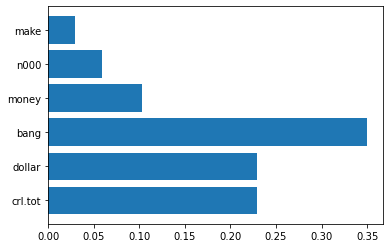

In [32]:
use=clf.feature_importances_
feat = list(Xtrain.columns)
p = plt.barh(feat,use)


In [ ]:
## Exercice 2

In [ ]:
from sklearn.ensemble import sklearn.ensemble.GradientBoostingClassifier


## Boosting

En Scikit-learn, les méthodes de bagging sont implémentées via la classe BaggingClassifier et BaggingRegressor dont voici la documentation :

Classification : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=boosting#sklearn.ensemble.GradientBoostingClassifier

Régression : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=boosting#sklearn.ensemble.GradientBoostingRegressor

Les constructeurs prennent en paramètres (entre autre) :
- n_estimators : integer, optional (default=10). Le nombre de classifieurs faibles.
- learning_rate : contrôle la vitesse de changement des poids par itération.
- base_estimator : (default=DecisionTreeClassifier) le classifieur faible utilisé.

In [128]:
clf = GradientBoostingClassifier()
clf.fit(Xtrain, Ytrain.values.ravel()) #.values.ravel() sert à mettre Ytrain en un vecteur
print("Les résultats avec les paramètres par défauts")
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(clf.score(Xtrain, Ytrain)))
print('En test, le taux de prédiction est de : {:.2f}'
     .format(clf.score(Xtest, Ytest)))

NameError: name 'GradientBoostingClassifier' is not defined

De la même manière que pour un arbre on voit faire une grille de recherche pour trouver les meilleurs paramètres.

In [36]:
from sklearn.model_selection import GridSearchCV
pgrid = {"n_estimators": [ 50, 75, 100, 200],
    "max_depth": [6, 7, 8, 9, 10],
      "min_samples_split": [2, 3, 5, 10],
        }
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(Xtrain,Ytrain.values.ravel())
print(grid_search.best_estimator_)
print("En entrainement, le taux de prédiction est de : {:.2f} "
      .format(grid_search.best_estimator_.score(Xtrain, Ytrain)))
print('En test, le taux de prédiction est de : {:.2f}'
     .format(grid_search.best_estimator_.score(Xtest, Ytest)))

GradientBoostingClassifier(max_depth=6, min_samples_split=3, n_estimators=75)
En entrainement, le taux de prédiction est de : 0.94 
En test, le taux de prédiction est de : 0.86


Extensions : Boosting regularisé, XGboost

In [1]:
from xgboost import XGBClassifier

In [4]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [12]:
bst.fit(Xtrain, Ytrain)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
preds = bst.predict(Xtest)